<a href="https://colab.research.google.com/github/prabhat-parth/Real-time-heterogeneity-activity-recognition/blob/master/HETRO_CLASSIFICATION_WATCH_GYROSCOPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

1.15.0


In [0]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/HETRO_DATA/Activity recognition exp/Activity recognition exp/Watch_gyroscope.csv")
data.head()
data.shape


(3205431, 10)

In [0]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))


No of duplicates in DATA: 0


In [0]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 470429 NaN/Null values in data


In [0]:
#sns.heatmap(data.isnull(), cbar=False)

In [0]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace= True)

In [0]:
#sns.heatmap(data.isnull(), cbar=False)

In [0]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 0 NaN/Null values in data


(2735002, 10)

In [0]:
#data = data.drop(['Arrival_Time'], axis = 1).copy()
data.shape

(2735002, 10)

In [0]:
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638743,27920678496000,-0.162187,-0.022104,0.059655,a,gear,gear_1,stand
1,1,1424696638743,27920681926000,-0.183225,-0.061785,0.012517,a,gear,gear_1,stand
2,2,1424696638743,27920692031000,-0.180829,-0.108657,-0.036485,a,gear,gear_1,stand
3,3,1424696638743,27920701997000,-0.147805,-0.157925,-0.098537,a,gear,gear_1,stand
4,7,1424696638744,27920743068000,0.182160,-0.323574,-0.277235,a,gear,gear_1,stand


In [0]:
#data = data.drop(['Index','Creation_Time','User','Model','Device'], axis = 1).copy()
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638743,27920678496000,-0.162187,-0.022104,0.059655,a,gear,gear_1,stand
1,1,1424696638743,27920681926000,-0.183225,-0.061785,0.012517,a,gear,gear_1,stand
2,2,1424696638743,27920692031000,-0.180829,-0.108657,-0.036485,a,gear,gear_1,stand
3,3,1424696638743,27920701997000,-0.147805,-0.157925,-0.098537,a,gear,gear_1,stand
4,7,1424696638744,27920743068000,0.182160,-0.323574,-0.277235,a,gear,gear_1,stand


In [0]:
data['gt'].value_counts()

bike          522672
walk          488309
stairsup      446023
stand         430223
stairsdown    428241
sit           419534
Name: gt, dtype: int64

In [0]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2735002 entries, 0 to 3205430
Data columns (total 10 columns):
Index            int64
Arrival_Time     int64
Creation_Time    int64
x                float64
y                float64
z                float64
User             object
Model            object
Device           object
gt               object
dtypes: float64(3), int64(3), object(4)
memory usage: 229.5+ MB


(2735002, 10)

In [0]:
Fs = 20
gt= data['gt'].value_counts().index
gt

Index(['bike', 'walk', 'stairsup', 'stand', 'stairsdown', 'sit'], dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['gt'])
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt,label
0,0,1424696638743,27920678496000,-0.162187,-0.022104,0.059655,a,gear,gear_1,stand,4
1,1,1424696638743,27920681926000,-0.183225,-0.061785,0.012517,a,gear,gear_1,stand,4
2,2,1424696638743,27920692031000,-0.180829,-0.108657,-0.036485,a,gear,gear_1,stand,4
3,3,1424696638743,27920701997000,-0.147805,-0.157925,-0.098537,a,gear,gear_1,stand,4
4,7,1424696638744,27920743068000,0.182160,-0.323574,-0.277235,a,gear,gear_1,stand,4


In [0]:
label.classes_

array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object)

In [0]:
X = data[['x', 'y', 'z']]
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.181342,-0.052623,0.077992,4
1,-0.202538,-0.126329,0.030247,4
2,-0.200124,-0.213392,-0.019386,4
3,-0.166853,-0.304907,-0.082237,4
4,0.165582,-0.612594,-0.263237,4
...,...,...,...,...
2734997,0.045334,0.307120,0.112140,0
2734998,0.076541,0.235697,0.102403,0
2734999,0.088378,0.170225,0.076438,0
2735000,0.105596,0.144433,0.056965,0


In [0]:
label.classes_

array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object)

In [0]:
Fs = 50
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40


In [0]:
import math as m
def get_frames(data, frame_size, hop_size):

  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0, len(scaled_X) - frame_size,hop_size):
    x = data['x'].values[i: i + frame_size]
    y = data['y'].values[i: i + frame_size]
    z = data['z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x, y, z])
    labels.append(label)
  # Bring the segments into a better shape
  frames = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)
  return frames, labels


In [0]:
X,y = get_frames(scaled_X, frame_size, hop_size)

In [0]:
X.shape
y.shape

(27349,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [0]:
X_train.shape, X_test.shape

((21879, 200, 3), (5470, 200, 3))

In [0]:
x_train_reshaped = X_train.reshape(21879, frame_size *3)
x_test_reshaped = X_test.reshape(5470,frame_size * 3)
x_train_reshaped.shape, x_test_reshaped.shape

((21879, 600), (5470, 600))

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

In [0]:
classifiers = [
    linear_model.LogisticRegression(),
    #KNeighborsClassifier(3),
    #SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    ]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
****Results****
Accuracy: 19.5430%
Log Loss: 1.8555622692263523
[[384  30 140 172  57 262]
 [375   0  13   8   4 438]
 [240  24 184 168  48 193]
 [278  12 136 178  39 249]
 [381   3  18  19   7 433]
 [361  13 143 106  38 316]]
0.19542961608775136
              precision    recall  f1-score   support

           0       0.19      0.37      0.25      1045
           1       0.00      0.00      0.00       838
           2       0.29      0.21      0.25       857
           3       0.27      0.20      0.23       892
           4       0.04      0.01      0.01       861
           5       0.17      0.32      0.22       977

    accuracy                           0.20      5470
   macro avg       0.16      0.19      0.16      5470
weighted avg       0.16      0.20      0.17      5470

complete !!!
DecisionTreeClassifier
****Results****
Accuracy: 51.3346%
Log Loss: 16.808450230941915
[[577  53  72  96 100 147]
 [ 39 517   1  14 256  11]
 [ 75   9 382 187  29 175]
 [ 73   6 

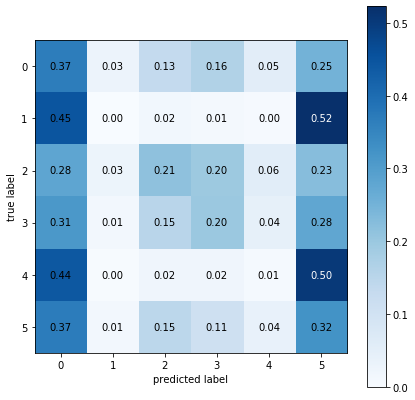

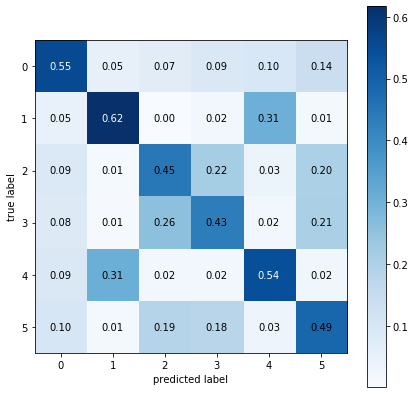

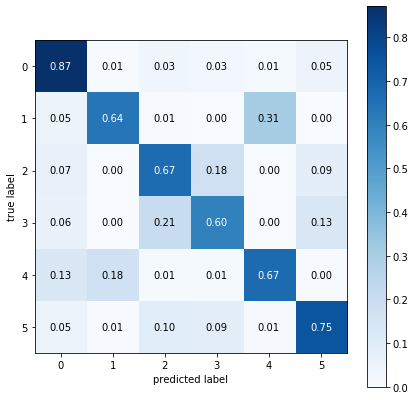

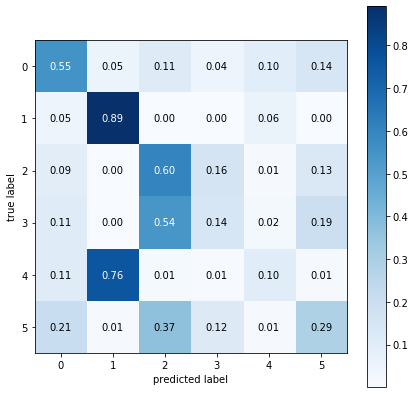

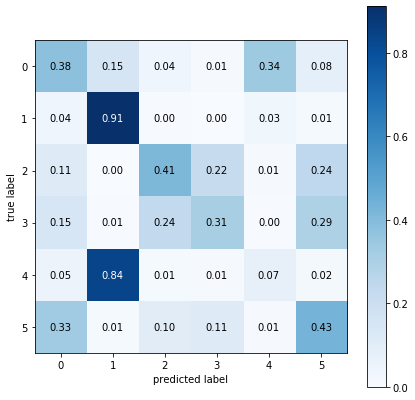

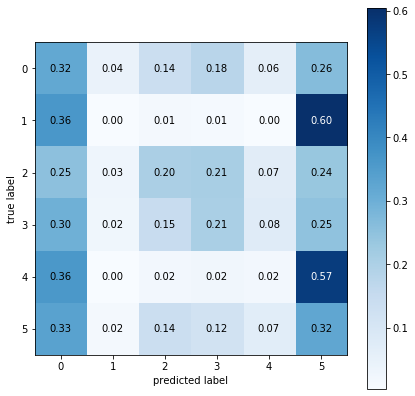

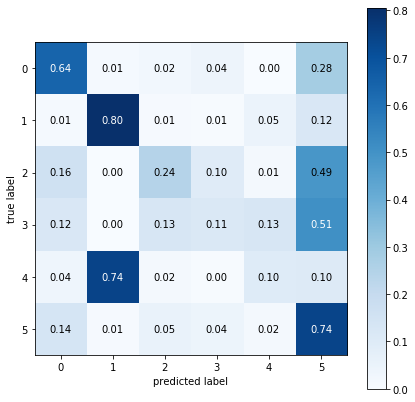

In [0]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train_reshaped, y_train)
    name = clf.__class__.__name__    
    print("="*30)
    print(name)
       
    print('****Results****')
    train_predictions = clf.predict(x_test_reshaped)
    
    acc = accuracy_score(y_test,train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(x_test_reshaped)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry) 
    
    y_pred = clf.predict(x_test_reshaped)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))  
    plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    
    print("complete !!!")

print("="*30)

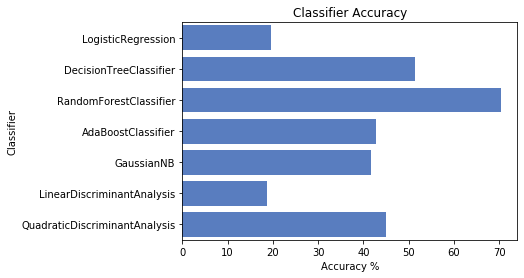

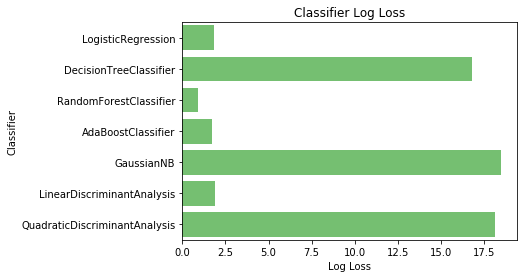

In [0]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()